In [ ]:
!pip install octis
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 14.1 MB/s 
     |████████████████████████████████| 170 kB 67.4 MB/s 
     |████████████████████████████████| 16.5 MB 32.1 MB/s 
     |████████████████████████████████| 24.1 MB 1.3 MB/s 
     |████████████████████████████████| 85 kB 6.1 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 100 kB 11.3 MB/s 
     |████████████████████████████████| 4.7 MB 59.1 MB/s 
     |████████████████████████████████| 1.2 MB 49.4 MB/s 
     |████████████████████████████████| 101 kB 13.0 MB/s 
     |████████████████████████████████| 596 kB 57.5 MB/s 
     |████████████████████████████████| 6.6 MB 60.5 MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp37-cp37m-linux_x86_64.whl size=233366 sha256=093dd3cc2512a5ce7e3da10bcb65aac7f55f0eaecb06b31ebddbb443c2476dd7
  Stored in directory: /root/.cache/pip/w

In [ ]:
from octis.dataset.dataset import Dataset
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

from octis.models.LDA import LDA
from octis.models.CTM import CTM
from octis.models.NeuralLDA import NeuralLDA
from octis.models.ProdLDA import ProdLDA
from octis.models.NMF import NMF
from octis.models.ETM import ETM

import os
import string
from octis.preprocessing.preprocessing import Preprocessing

import pandas as pd
import numpy as np
import inspect
import matplotlib.pyplot as plt
import time
import json
from numpy import transpose
from wordcloud import WordCloud
from matplotlib.pyplot import figure
from PIL import Image
#from bertopic import BERTopic

In [ ]:
# Run this to mount the Notebook in your Google Drive account 
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Creates dataset like in the training notebook.

In [ ]:
os.chdir(os.path.pardir)

# Initialize preprocessing
preprocessor = Preprocessing(vocabulary=None, max_features=None,
                             remove_punctuation=True, punctuation=string.punctuation,
                             lemmatize=True, stopword_list='english',
                             min_chars=1, min_words_docs=0)
# preprocess
dataset = preprocessor.preprocess_dataset(documents_path=r'/content/drive/My Drive/nasa/OCTIS/titles.csv')

# save the preprocessed dataset
dataset.save('zot')

created vocab
4856


### Model 1 : CTM 
(why are the models out of order? they shouldn't be :p)

Once again, the format for all future models will follow the one described for Model #1:

- First cell evaluates the model with the best set of hyperparameters, and the model is trained 3 different times since there is randomness in topic modeling. Time is shown for how long it took to evaluate.

- Second cell calculates coherence and diversity scores for each output from the first cell.

- Third cell prints the list of topics and most prevalent words in each topic.

In [ ]:
start = time.time()

# Create Model
model = CTM(num_topics=40, inference_type='zeroshot', 
            bert_model="bert-base-nli-mean-tokens", activation='sigmoid',
            dropout=0.061557, num_layers=1, num_neurons=200)
# Train the model using default partitioning choice 
# output has topic-word-matrix, topics, topic-document-matrix, test-topic-document-matrix
ctm_output1 = model.train_model(dataset)
ctm_output2 = model.train_model(dataset)
ctm_output3 = model.train_model(dataset)

end = time.time()
duration = end - start
print('Optimizing model took: ' + str(round(duration)) + ' seconds.')

Optimizing model took: 94 seconds.


In [ ]:
# Initialize metric
npmi = Coherence(texts=dataset.get_corpus(), topk=6, measure='c_v')
# Initialize metric
topic_diversity = TopicDiversity(topk=6)
# Retrieve metrics score
topic_diversity_score1 = topic_diversity.score(ctm_output1)
topic_diversity_score2 = topic_diversity.score(ctm_output2)
topic_diversity_score3 = topic_diversity.score(ctm_output3)
print("Topic diversity: " + str(topic_diversity_score1) + " " + str(topic_diversity_score2) + " " + str(topic_diversity_score3))

npmi_score1 = npmi.score(ctm_output1)
npmi_score2 = npmi.score(ctm_output2)
npmi_score3 = npmi.score(ctm_output3)
print("Coherence: " + str(npmi_score1) + " " + str(npmi_score2) + " " + str(npmi_score3))

Topic diversity: 0.7541666666666667 0.8083333333333333 0.775
Coherence: 0.5906997481610606 0.5877501760569925 0.5881393348901346


In [ ]:
for t in ctm_output2['topics']:
  print(" ".join(t[0:6]))

summer diurnal monsoon cycle season convective
china product evaluation gpm imerg mainland
volcanic volcano emission eruption so large
trmm daily monthly b gauge gpm
solar radiation irradiance uv ultraviolet aura
vegetation forest change climate amazon dynamic
sub east omi asia tropospheric i
drought flood index case study sensing
span small style variant caps font
rainfall rain estimate trmm gauge datum
no level satellite moisture soil remote
africa south tropical southern cyclone america
rainfall satellite evaluation gauge iran estimate
learning machine neural microwave network error
radar precipitation rain global mission tropical
monsoon summer indian asian tropical convection
snow cover plateau tibetan snowfall mountain
high resolution rainfall heavy estimate west
atmospheric transport ocean convection sea eastern
arctic ice temperature cloud inversion winter
resolution high base estimate precipitation a
basin river hydrological upper evaluation dataset
aerosol satellite observati

### Model 2 : NeuralLDA

In [ ]:
start = time.time()

# Create Model
model = NeuralLDA(num_topics=30, dropout=0.314508, num_layers=1, num_neurons=300)
# Train the model using default partitioning choice 
# output has topic-word-matrix, topics, topic-document-matrix, test-topic-document-matrix
nda_output1 = model.train_model(dataset)
nda_output2 = model.train_model(dataset)
nda_output3 = model.train_model(dataset)

end = time.time()
duration = end - start
print('Optimizing model took: ' + str(round(duration)) + ' seconds.')

Epoch: [1/100]	Samples: [2992/299200]	Train Loss: 119.76673081341912	Time: 0:00:01.940189
Epoch: [1/100]	Samples: [642/64200]	Validation Loss: 97.15980639116043	Time: 0:00:00.115708
Epoch: [2/100]	Samples: [5984/299200]	Train Loss: 115.49270058698195	Time: 0:00:01.820300
Epoch: [2/100]	Samples: [642/64200]	Validation Loss: 89.18413838419217	Time: 0:00:00.123514
Epoch: [3/100]	Samples: [8976/299200]	Train Loss: 111.66653801413143	Time: 0:00:01.835670
Epoch: [3/100]	Samples: [642/64200]	Validation Loss: 88.19819669634383	Time: 0:00:00.119273
Epoch: [4/100]	Samples: [11968/299200]	Train Loss: 107.9851235782399	Time: 0:00:01.760343
Epoch: [4/100]	Samples: [642/64200]	Validation Loss: 88.60154529226904	Time: 0:00:00.114616
Epoch: [5/100]	Samples: [14960/299200]	Train Loss: 106.13613010345296	Time: 0:00:01.746549
Epoch: [5/100]	Samples: [642/64200]	Validation Loss: 89.3195039030176	Time: 0:00:00.118392
Epoch: [6/100]	Samples: [17952/299200]	Train Loss: 103.95534805053059	Time: 0:00:01.766864

In [ ]:
# Initialize metric
npmi = Coherence(texts=dataset.get_corpus(), topk=6, measure='c_v')
# Initialize metric
topic_diversity = TopicDiversity(topk=6)
# Retrieve metrics score
topic_diversity_score1 = topic_diversity.score(nda_output1)
topic_diversity_score2 = topic_diversity.score(nda_output2)
topic_diversity_score3 = topic_diversity.score(nda_output3)
print("Topic diversity: " + str(topic_diversity_score1) + " " + str(topic_diversity_score2) + " " + str(topic_diversity_score3))

npmi_score1 = npmi.score(nda_output1)
npmi_score2 = npmi.score(nda_output2)
npmi_score3 = npmi.score(nda_output3)
print("Coherence: " + str(npmi_score1) + " " + str(npmi_score2) + " " + str(npmi_score3))

Topic diversity: 0.8222222222222222 0.8611111111111112 0.8833333333333333
Coherence: 0.38498589024991775 0.37060090601907786 0.38660471875451985


In [ ]:
for t in nda_output3['topics']:
  print(" ".join(t[0:6]))

plot nepalese sample evi plata isentropic
convective amazon parameter productivity stratiform brazil
dynamic stratification subsequent mead scandinavia outdoor
land new near assessment learning anomaly
base microwave flux perspective machine spatial
radar passive wind thermal property groundwater
british outdoor hy subsequent plata ready
air temperature south summer index indian
admission plata supercell skynet reproduce altitudinal
trmm datum china evaluation basin river
aerosol analysis rainfall measurement variation assessment
comparison validation column tropospheric total instrument
change climate soil dust moisture extreme
scandinavia supercell subsequent formalism ceres field
study variability influence relationship africa factor
low southern atlantic scheme monthly grace
observation global high resolution reanalysis space
model impact remote ocean estimation data
altitudinal tandem mead rama discrete mips
tropical water sea radiative cyclone storm
satellite retrieval surface a 

### Model 3 : ProdLDA

In [ ]:
start = time.time()

# Create Model
model = ProdLDA(num_topics=25, dropout=0.221017, num_layers=2, num_neurons=300)
# Train the model using default partitioning choice 
# output has topic-word-matrix, topics, topic-document-matrix, test-topic-document-matrix
pda_output1 = model.train_model(dataset)
pda_output2 = model.train_model(dataset)
pda_output3 = model.train_model(dataset)

end = time.time()
duration = end - start
print('Optimizing model took: ' + str(round(duration)) + ' seconds.')

Epoch: [1/100]	Samples: [2992/299200]	Train Loss: 119.49703261431526	Time: 0:00:02.905158
Epoch: [1/100]	Samples: [642/64200]	Validation Loss: 103.30272676937305	Time: 0:00:00.165341
Epoch: [2/100]	Samples: [5984/299200]	Train Loss: 116.66453250334224	Time: 0:00:03.273872
Epoch: [2/100]	Samples: [642/64200]	Validation Loss: 99.90630685206143	Time: 0:00:00.116683
Epoch: [3/100]	Samples: [8976/299200]	Train Loss: 114.0593165433343	Time: 0:00:01.768667
Epoch: [3/100]	Samples: [642/64200]	Validation Loss: 98.54437909467941	Time: 0:00:00.116665
Epoch: [4/100]	Samples: [11968/299200]	Train Loss: 111.77908880060369	Time: 0:00:01.779368
Epoch: [4/100]	Samples: [642/64200]	Validation Loss: 98.19756887560693	Time: 0:00:00.116263
Epoch: [5/100]	Samples: [14960/299200]	Train Loss: 109.76438634535846	Time: 0:00:02.450062
Epoch: [5/100]	Samples: [642/64200]	Validation Loss: 98.00747671157029	Time: 0:00:00.124242
Epoch: [6/100]	Samples: [17952/299200]	Train Loss: 107.80717900730072	Time: 0:00:02.3057

In [ ]:
# Initialize metric
npmi = Coherence(texts=dataset.get_corpus(), topk=6, measure='c_v')
# Initialize metric
topic_diversity = TopicDiversity(topk=6)
# Retrieve metrics score
topic_diversity_score1 = topic_diversity.score(pda_output1)
topic_diversity_score2 = topic_diversity.score(pda_output2)
topic_diversity_score3 = topic_diversity.score(pda_output3)
print("Topic diversity: " + str(topic_diversity_score1) + " " + str(topic_diversity_score2) + " " + str(topic_diversity_score3))

npmi_score1 = npmi.score(pda_output1)
npmi_score2 = npmi.score(pda_output2)
npmi_score3 = npmi.score(pda_output3)
print("Coherence: " + str(npmi_score1) + " " + str(npmi_score2) + " " + str(npmi_score3))

Topic diversity: 0.68 0.7533333333333333 0.78
Coherence: 0.5280198008872897 0.44913280631474284 0.5791132921084581


In [ ]:
for t in pda_output3['topics']:
  print(" ".join(t[0:6]))

index assessment drought vegetation series time
incidence accumulation affect assessing erosion ande
product evaluation b precipitation imerg trmm
model span simulation small font variant
change impact climate response covid lockdown
basin river evaluation upper hydrological trmm
precipitation estimate base gpm radar rain
satellite observation volcano malaysia measurement datum
surface land temperature model observation air
polar arctic stratospheric antarctic ice winter
aerosol optical dust atmospheric depth long
amazon innovation gee wegenernet ob regcm
monsoon diurnal summer tropical cycle indian
sub observation no lt gt satellite
product trmm b evaluation imerg precipitation
omi sub column retrieval ground observation
study event india impact case scale
tropical convective convection wave cyclone tropic
remote sensing area brazil state mountainous
effect radiative variation water vapor flux
river flood basin spatial temporal multi
base resolution estimate datum precipitation satell

### Model 4 : LDA

In [ ]:
start = time.time()

# Create Model
model = LDA(num_topics=45, alpha=0.335145)
# Train the model using default partitioning choice 
# output has topic-word-matrix, topics, topic-document-matrix, test-topic-document-matrix
lda_output1 = model.train_model(dataset)
lda_output2 = model.train_model(dataset)
lda_output3 = model.train_model(dataset)

end = time.time()
duration = end - start
print('Optimizing model took: ' + str(round(duration)) + ' seconds.')

Optimizing model took: 15 seconds.


In [ ]:
# Initialize metric
npmi = Coherence(texts=dataset.get_corpus(), topk=6, measure='c_v')
# Initialize metric
topic_diversity = TopicDiversity(topk=6)
# Retrieve metrics score
topic_diversity_score1 = topic_diversity.score(lda_output1)
topic_diversity_score2 = topic_diversity.score(lda_output2)
topic_diversity_score3 = topic_diversity.score(lda_output3)
print("Topic diversity: " + str(topic_diversity_score1) + " " + str(topic_diversity_score2) + " " + str(topic_diversity_score3))

npmi_score1 = npmi.score(lda_output1)
npmi_score2 = npmi.score(lda_output2)
npmi_score3 = npmi.score(lda_output3)
print("Coherence: " + str(npmi_score1) + " " + str(npmi_score2) + " " + str(npmi_score3))

Topic diversity: 0.5703703703703704 0.5740740740740741 0.5592592592592592
Coherence: 0.48105908892699395 0.4421009917822149 0.42266516283153516


In [ ]:
for t in lda_output1['topics']:
  print(" ".join(t[0:6]))

drought aerosol precipitation index base analysis
precipitation trmm estimate evaluation climate mid
precipitation variability period rainfall product basin
measurement island omi ozone aerosol satellite
base network neural rainfall space observation
multi basin river satellite hydrological evaluation
aerosol optical volcanic satellite black property
rainfall precipitation trmm satellite measure datum
ozone retrieval tropospheric instrument dioxide profile
product china imerg precipitation gpm evaluation
high resolution groundwater cloud rainfall datum
model simulation climate datum evaluation product
sensing remote base study technique case
change influence groundwater atmospheric use brazil
microwave humidity temperature lightning brightness covid
china observation analysis datum sub omi
north the satellite base activity ocean
span small style font caps variant
tropical trmm rainfall cyclone contribution emission
monsoon system convective prediction precipitation scale
surface clear 

### Saving our best output to local files so we can import it again (important for visualizations if you don't want to run everything again! or preserve your output so results are consistent across different days)

In [ ]:
with open("/content/drive/My Drive/nasa/OCTIS/ctm_1", "w") as fp:
  json.dump(ctm_output2['topics'], fp)

with open("/content/drive/My Drive/nasa/OCTIS/ctm_2", "w") as fp:
  json.dump(ctm_output2['topic-document-matrix'].tolist(), fp)

with open("/content/drive/My Drive/nasa/OCTIS/ctm_3", "w") as fp:
  json.dump(ctm_output2['test-topic-document-matrix'].tolist(), fp)

with open("/content/drive/My Drive/nasa/OCTIS/ctm_4", "w") as fp:
  json.dump(ctm_output2['topic-word-matrix'].tolist(), fp)

Or with a save function!

In [ ]:
def save_fn(model_name, output):
  with open("/content/drive/My Drive/nasa/OCTIS/" + model_name +  "_1", "w") as fp:
    json.dump(output['topics'], fp)

  with open("/content/drive/My Drive/nasa/OCTIS/" + model_name +  "_2", "w") as fp:
    json.dump(output['topic-document-matrix'].tolist(), fp)

  with open("/content/drive/My Drive/nasa/OCTIS/" + model_name +  "_3", "w") as fp:
    json.dump(output['test-topic-document-matrix'].tolist(), fp)

  with open("/content/drive/My Drive/nasa/OCTIS/" + model_name +  "_4", "w") as fp:
    json.dump(output['topic-word-matrix'].tolist(), fp)

In [ ]:
save_fn('pda', pda_output3)

Reading in the stuff that was saved.. just testing stuff here

In [ ]:
ctm_output2 = {}

with open("/content/drive/My Drive/nasa/OCTIS/ctm_1", "r") as fp:
   ctm_output2['topics'] = json.load(fp)

with open("/content/drive/My Drive/nasa/OCTIS/ctm_2", "r") as fp:
   ctm_output2['topic-document-matrix'] = json.load(fp)

with open("/content/drive/My Drive/nasa/OCTIS/ctm_3", "r") as fp:
   ctm_output2['test-topic-document-matrix'] = json.load(fp)

with open("/content/drive/My Drive/nasa/OCTIS/ctm_4", "r") as fp:
   ctm_output2['topic-word-matrix'] = json.load(fp)

In [ ]:
with open("/content/drive/My Drive/nasa/OCTIS/nda_topics", "w") as fp:
  json.dump(pda_output3['topics'], fp)

In [ ]:
with open("/content/drive/My Drive/nasa/OCTIS/lda_topics", "w") as fp:
  json.dump(lda_output1['topics'], fp)

Model 5 : BERTopic - well that didn't quite work just yet

In [ ]:
from sentence_transformers import SentenceTransformer
start = time.time()

# Create Model
model = BERTopic(nr_topics=10)
# Train the model using default partitioning choice 
# output has topic-word-matrix, topics, topic-document-matrix, test-topic-document-matrix
lda_output1 = model.train_model(dataset)
lda_output2 = model.train_model(dataset)
lda_output3 = model.train_model(dataset)

end = time.time()
duration = end - start
print('Optimizing model took: ' + str(round(duration)) + ' seconds.')

NameError: ignored

### (OPTIONAL)

The code below can be safely ignored, because all of it is in the visualizations notebook but in more depth there. So I won't explain these here.

In [ ]:
topic_document_matrix = np.concatenate((ctm_output5['topic-document-matrix'], ctm_output5['test-topic-document-matrix']), axis=1)

In [ ]:
ctm_output2['topic-word-matrix'][0][3853], ctm_output2['topic-word-matrix'][0][976]

(0.25403935, 0.29308546)

In [ ]:
def topic_word_dist(num, amt):
  indices = np.flip(np.argsort(ctm_output2['topic-word-matrix'][num])[-amt:], 0).tolist()
  vals = []
  words = []
  for i in indices:
    vals.append(ctm_output2['topic-word-matrix'][num][i])
    words.append(dataset.get_vocabulary()[i])
  
  plt.bar(words, vals)
  plt.xticks(rotation = 45)


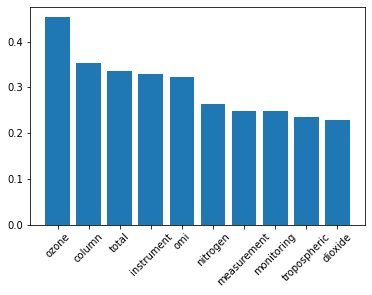

In [ ]:
topicnum = 26
topic_word_dist(topicnum, 10)

In [ ]:
def single_document_dist(num):
  matrix = transpose(topic_document_matrix)
  indices = np.flip(np.argsort(matrix[num]), 0).tolist()
  vals = []
  for i in indices:
    vals.append(matrix[num][i])

  plt.bar(indices, vals)
  plt.xticks(rotation = 45)


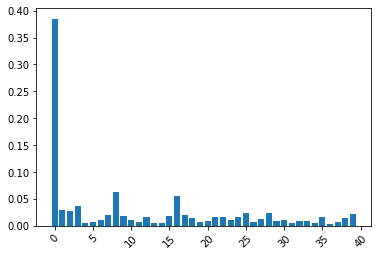

In [ ]:
single_document_dist(10)

In [ ]:
def full_document_dist(threshold):
  matrix = transpose(topic_document_matrix)
  vals = [0] * matrix.shape[1]
  for doc in matrix:
    for topic in range(matrix.shape[1]):
      if doc[topic]:
        vals[topic] += doc[topic] / matrix.shape[0]

  plt.bar(range(40), vals)

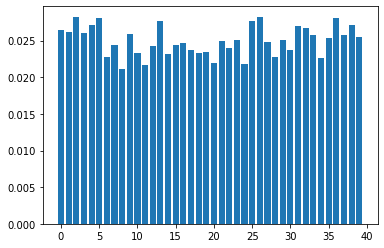

In [ ]:
full_document_dist(1)

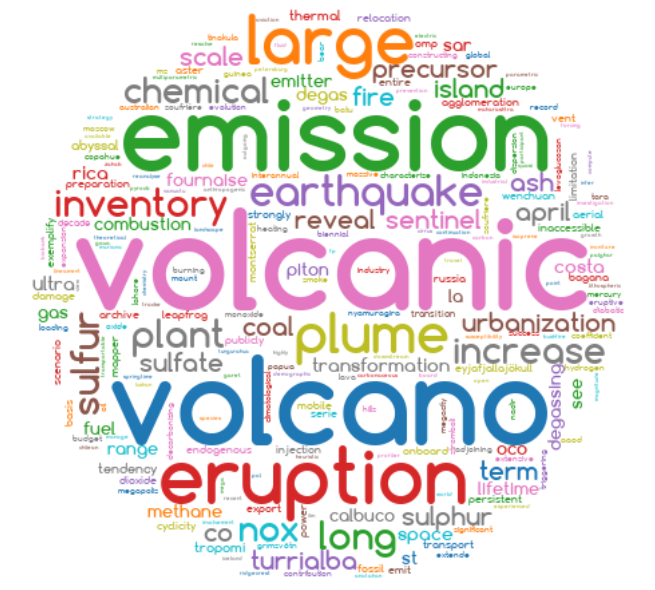

In [ ]:
def topic_word_cloud(num):
  font_path = "/content/drive/My Drive/nasa/OCTIS/Comfortaa-Bold.ttf"
  mask = np.array(Image.open("/content/drive/My Drive/nasa/OCTIS/circle.png"))
  indices = np.flip(np.argsort(ctm_output2['topic-word-matrix'][num]), 0).tolist()
  word_list = []
  for i in indices:
    weight = ctm_output2['topic-word-matrix'][num][i] * 20 // 1
    word = dataset.get_vocabulary()[i]
    for i in np.arange(weight):
      word_list.append(word)

  text = " ".join(word_list)
  
  word_cloud = WordCloud(collocations = False, width=1600, height=800, colormap='tab10', font_path=font_path,
                         max_words=300, background_color='white', prefer_horizontal=0.9, mask=mask).generate(text)
  # Display the generated Word Cloud
  plt.figure( figsize=(14,8))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

topic_word_cloud(2)